# Initial Conditions for Monsoon Impact Study
This notebook defines the initial conditions used to study the impact of seasonal monsoons on ocean stratification in the Arabian Sea. We define temperature, salinity, and density profiles for the pre-monsoon state, plot these initial conditions, and explain how they will be implemented in the model.


In [1]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.interpolate import griddata
import netCDF4 as nc4
import xarray as xr

Initial conditions of the Salinity and Temperature for May which is the Pre-monsoon climatology data for the Arabian Sea.

In [2]:
# Load temperature and salinity NetCDF files
temperature_file = '/Users/surjitsingh/Desktop/CS185C/Project/TEMPwoa18_decav_t05_01.nc' # Got From NOAA website 
salinity_file = '/Users/surjitsingh/Desktop/CS185C/Project/SALTwoa18_decav_s05_01.nc'

# Use xarray to open the NetCDF files
temperature_data = xr.open_dataset(temperature_file, decode_times=False) #Got error so had to put decode_time=False
salinity_data = xr.open_dataset(salinity_file, decode_times=False)


In [3]:
# Subset the temperature data for the Arabian Sea region
temperature_subset = temperature_data['t_an'].sel(
    lon=slice(63.6, 72.0), 
    lat=slice(8.6, 24.4)
)

# Subset the salinity data for the Arabian Sea region
salinity_subset = salinity_data['s_an'].sel(
    lon=slice(63.6, 72.0), 
    lat=slice(8.6, 24.4)
)

#specify depth (selecting surface level data)
temperature_surface = temperature_subset.isel(depth=0)
salinity_surface = salinity_subset.isel(depth=0)


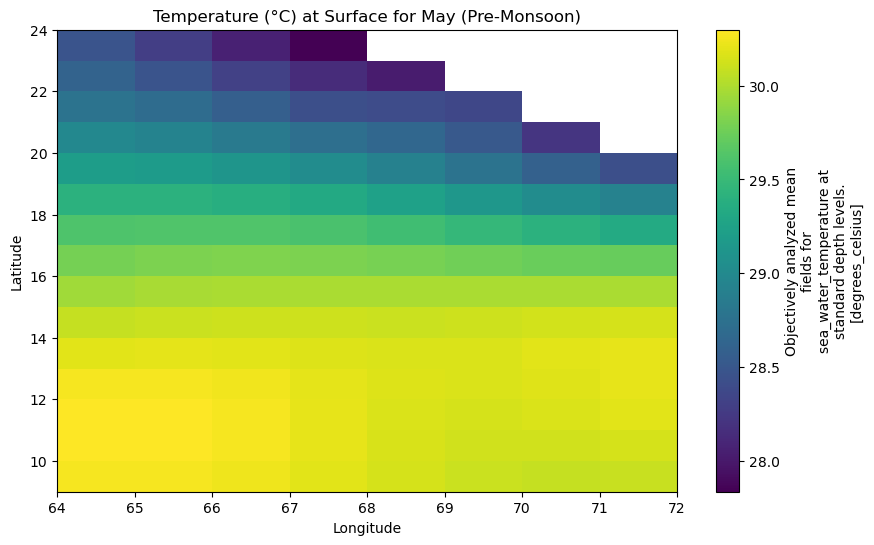

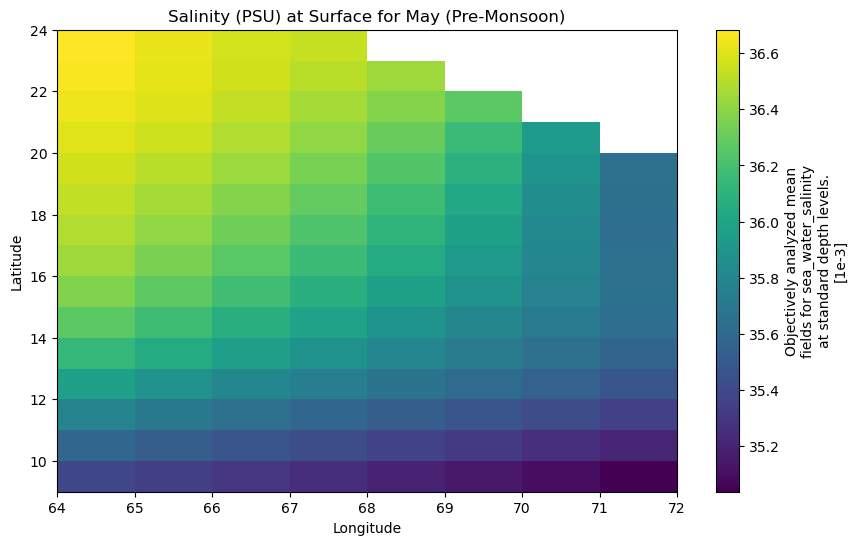

In [4]:
# Plot the temperature data
plt.figure(figsize=(10, 6))
temperature_surface.plot()
plt.title('Temperature (°C) at Surface for May (Pre-Monsoon)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the salinity data
plt.figure(figsize=(10, 6))
salinity_surface.plot()
plt.title('Salinity (PSU) at Surface for May (Pre-Monsoon)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Save for easier further use like comparing in the future 

In [5]:
# Save the subset temperature data to a new NetCDF file
temperature_surface.to_netcdf('arabian_sea_temperature_may.nc')

# Save the subset salinity data to a new NetCDF file
salinity_surface.to_netcdf('arabian_sea_salinity_may.nc')
